In [1]:
import pandas as pd

In [2]:
data_info=pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info.head(30)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
# Loading the data and other imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#might be nedded depending on your version of Jupyter
%matplotlib inline

In [9]:
df=pd.read_csv('lending_club_loan_two.csv')

In [10]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [11]:
#df.drop('term',axis=1)
#df.drop('emp_length',axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [13]:
# Project task 

In [14]:
# SECTION 1: EXPLORATORY DATA ANALYSIS
# OVERALL GOAL: Get an understanding for which variables are important, 
# view summary statistics, and visualize the data    

In [15]:
# TASK: Since we will be attempting to preding loan_status, create a countplot
# as shownbelow

<Axes: xlabel='loan_status', ylabel='count'>

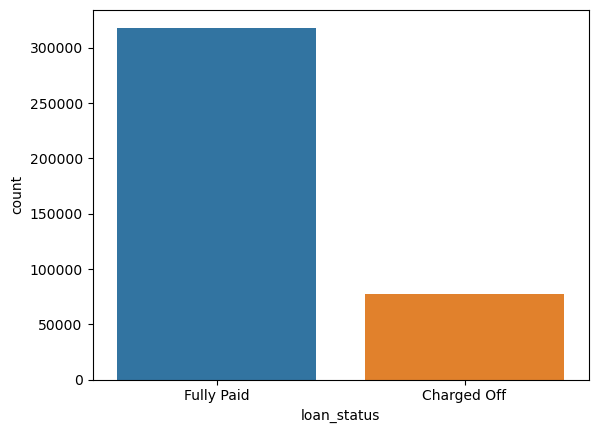

In [16]:
sns.countplot(x='loan_status',data=df)

In [17]:
# TASK: Create a histogram of the loan_amnt column

C:\Users\filda\AppData\Local\Temp\ipykernel_22580\924247553.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],kde=False,bins=40)


<Axes: xlabel='loan_amnt'>

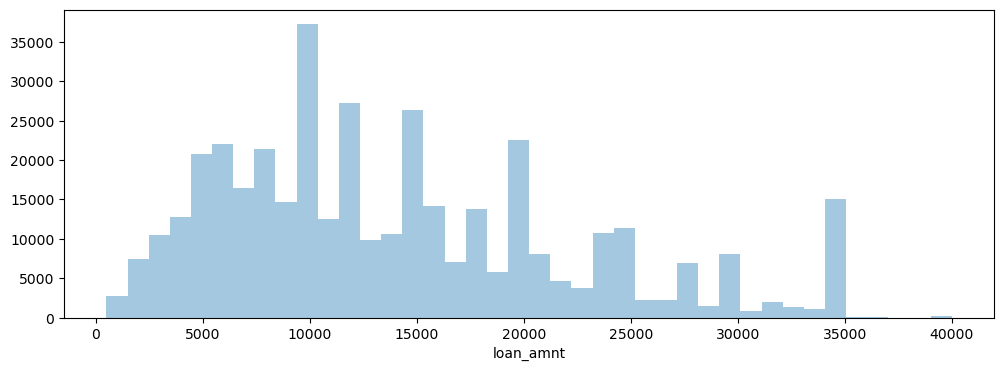

In [18]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

In [19]:
# TASK: Let's explore correlation between the continuous feature variables. 
# Calculate the correlation between all continuos numeric variables using .corr() method

In [20]:
 ### df.corr()

In [21]:
# TASK: Visualize the using a heatmap.Depending on yourversion of matplotlib, you may need
# to manually adjust the heatmap

In [22]:
### plt.figure(figsize=(12,7))
### sns.heatmap(df.corr(),annot=True,cmap='viridis')
### plt.ylim(10,0)

In [23]:
# TASK: You should have noticed almost perfect correlation with the 'installment'
# feature. Explore this feature further. Print out their descriptions and perform
# a scatterplot between them. Does this relationship make sense to you?
# Do you think there iss duplicate information here?

In [24]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [25]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

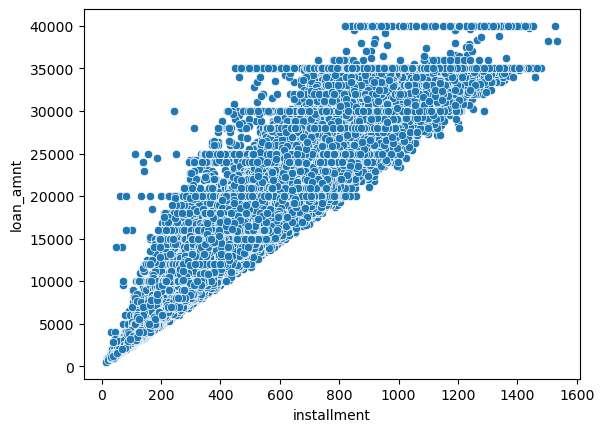

In [26]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

In [27]:
# TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

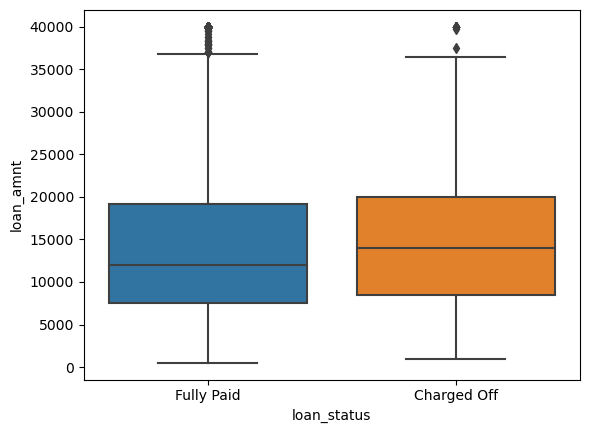

In [28]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [29]:
# Calculate the summary statistics for the loan amount, grouped by the loan_status.

In [30]:
df.groupby('loan_status').describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [31]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [32]:
# TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.
# What are the unique possible grades and subgrades

In [33]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [34]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [35]:
feat_info('sub_grade')

LC assigned loan subgrade


In [36]:
# TASK: Create a countplot per grade. Set the hue to the loan_status label.

<Axes: xlabel='grade', ylabel='count'>

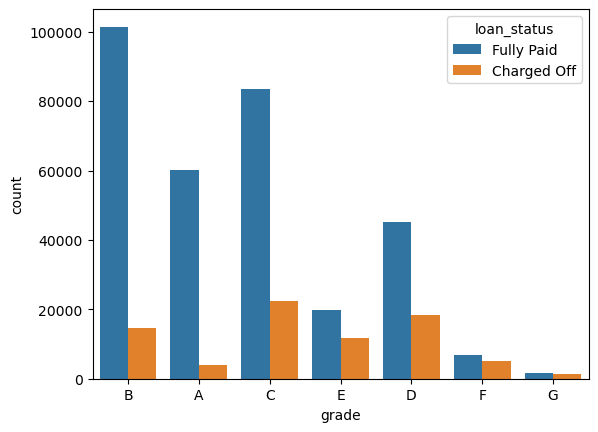

In [37]:
sns.countplot(x='grade',data=df,hue='loan_status')

In [38]:
# TASK: Display a count plot per subgrade. You may need to resize for this
# plot and reorder the x axis. Feel free the edit the color palette. Explore both
# all loans made per subgrade as well being separated based on the loan_status.
# After creating  this plot, go ahead and create a similar plot, but set hue='loan_status'

<Axes: xlabel='sub_grade', ylabel='count'>

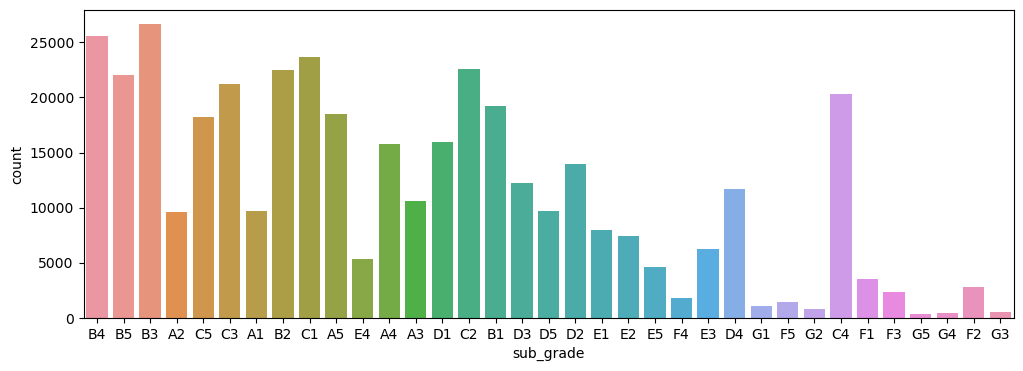

In [39]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df)

<Axes: xlabel='sub_grade', ylabel='count'>

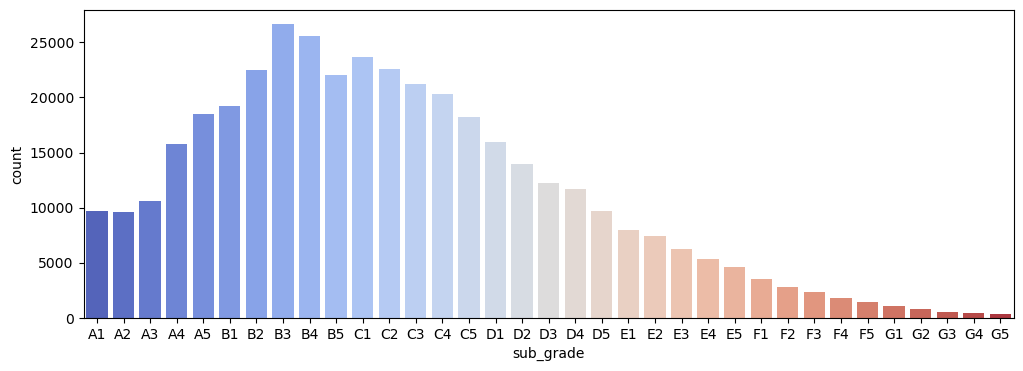

In [40]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

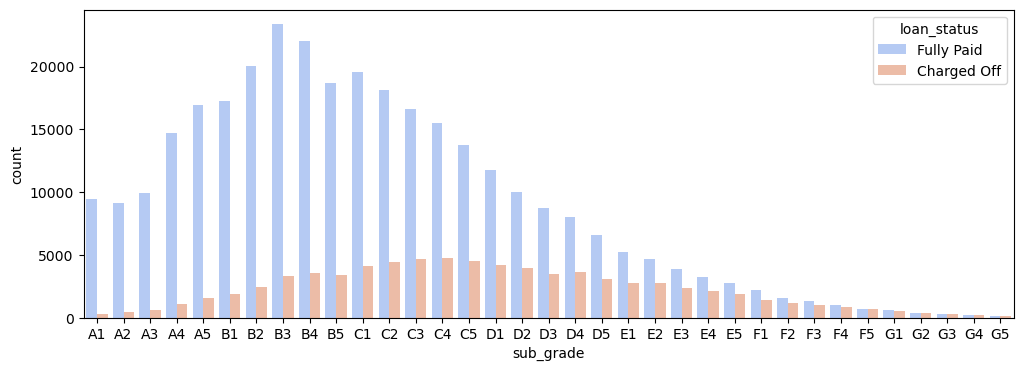

In [41]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')

In [42]:
# TASK: It looks like F and G subgrades do not get paid back that often Isloate those and recreate
# the countplot just for thosesubgrades

<Axes: xlabel='sub_grade', ylabel='count'>

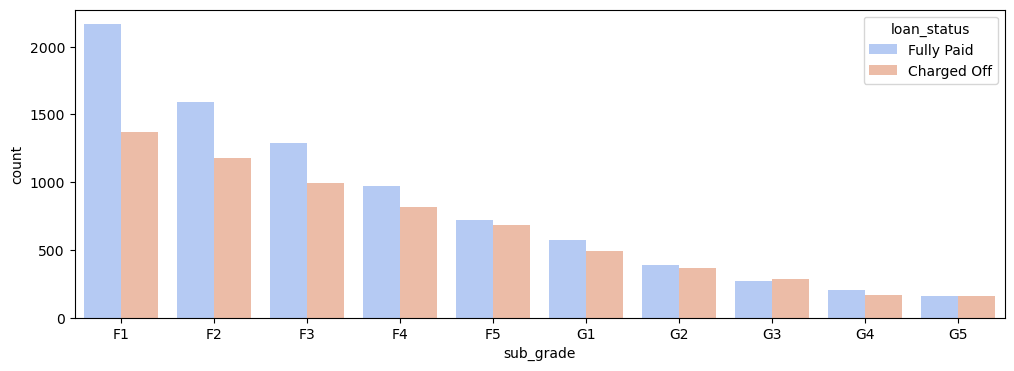

In [43]:
f_and_g=df[(df['grade']=='G')|(df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order=sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,
              palette='coolwarm',hue='loan_status')

In [44]:
# TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status
# was 'Fully Paid' and a 0 if it was 'Charged Off'

In [45]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [46]:
# CHALLENGE TASK:(Note this is hand, but can be done in one line!) Create a bar plot showing the 
# correlation of the numeric features to the new loan_repaid column

In [47]:
### df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [48]:
# SECTION 2: DATA PREPROCESSING

In [49]:
# SECTION GOALS: Remove of fill any missing data. Remove unnecessary or repetitive features.
# Convert categorical string features to dummy variables

In [50]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [51]:
# Missing Data
# Let's explore this missing data columns. We use a variety of factors to decide whether 
# or not they would  be useful, to see if we should keep, discard, or fill in the missing data.

In [52]:
# TASK: What is the length of the dataframe?

In [53]:
len(df)

396030

In [54]:
# TASK: Create a Series that display the total count of missing values per column.

In [55]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [56]:
# TASK: Convert this Series to be in term of procentage of the total DataFrame

In [57]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [58]:
# TASK: Let's examine emp_title and emp_length to see whether it will be okey to drop them.
# Print out their feature information using the feat_info() function from the top of this notebook.

In [59]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [60]:
# TASK: How many unque employment job titles are there?

In [61]:
df['emp_title'].nunique()

173105

In [62]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [63]:
# TASK: Realistically there are too many unique job titles to try to convert this to a dummy
# variable feature. Let's remove that emp_title column.

In [64]:
df=df.drop('emp_title',axis=1)

In [65]:
# TASK: Create a count plot of the emp_length feature column. 
# Challenge: Sort the order of the values.

In [66]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [67]:
df['emp_length'].dropna()

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 377729, dtype: object

In [68]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [69]:
emp_length_order=[
 '< 1 year',                
 '1 year',                
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'                 
 ]

<Axes: xlabel='emp_length', ylabel='count'>

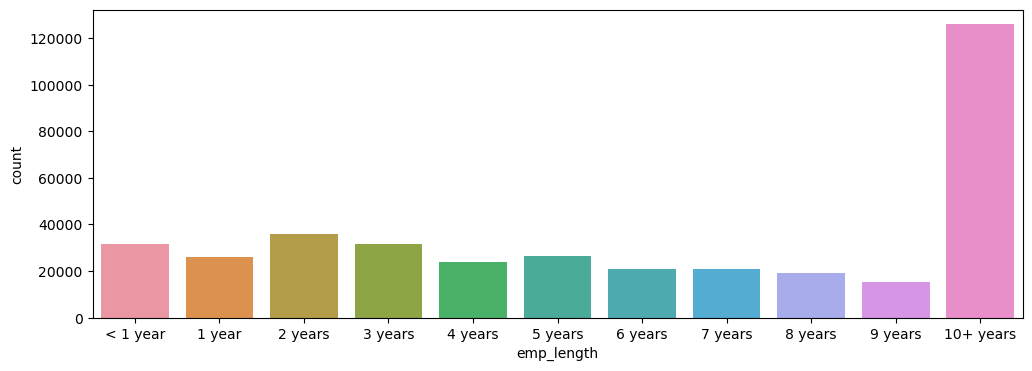

In [70]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

In [71]:
# TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off

<Axes: xlabel='emp_length', ylabel='count'>

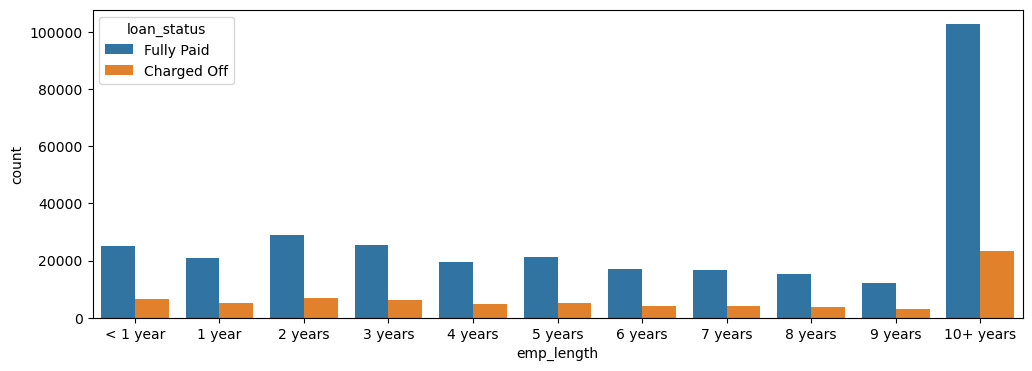

In [72]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [73]:
# CHALLENGE TASK: This  still does not really inform us if there is a strong  relationship between
# employment length and being charged off, what we want is the percentage of charge offs per category.
# Essentially informing us what percent of people per employment category did not pay back their loan.
# There are a multitude of ways to create this Series. Once you have created it see if visualize it with
# a bar plot. This may be tricky, refer to solutions if you get stuck on creating this Series.

In [74]:
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [75]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [76]:
emp_len=emp_co/(emp_co+emp_fp)

<Axes: xlabel='emp_length'>

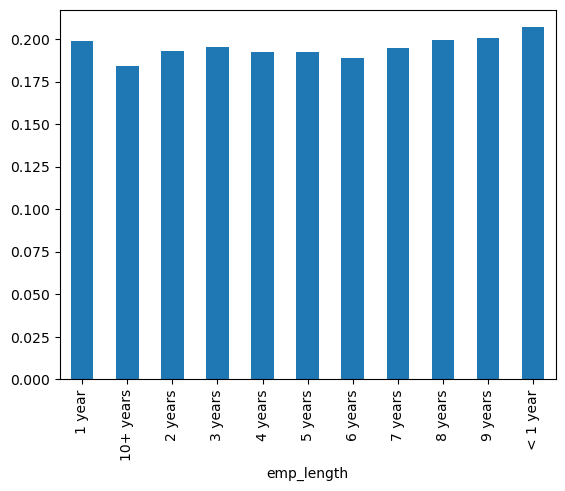

In [77]:
emp_len.plot(kind='bar')

In [78]:
# TASK: Charge off rates are extremely similar across all employemnt lengths. Go ahead
# and drop emp_length column.

In [79]:
df=df.drop('emp_length',axis=1)

In [80]:
# TASK: Revisit the DataFrame to see what feature columns still have missing data.

In [81]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [82]:
# Part 147

In [83]:
# TASK: Review the title column vs the purpose column. It this repeated information?

In [84]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [85]:
feat_info('title')

The loan title provided by the borrower


In [86]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [87]:
# TASK: The title column is simply a string subcategory/description of the purpose column.
# Go ahead and drop the title column.

In [88]:
df=df.drop('title',axis=1)

In [89]:
# NOTE: This is one of the hardest parts of the project! Refer to the solutions video
# if you need guidance, feel free to fill or drop the missing values of the mort_acc
# however ypu see fit! Here we are going with a very specific approach.

In [90]:
# TASK: Find out what the mort_acc feature represents

In [91]:
feat_info('mort_acc')

Number of mortgage accounts.


In [92]:
# TASK Create a value_counts of the mort_acc column.

In [93]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [94]:
# TASK: There are many ways we could deal with this missing data. We could attempt to built
# a simple model to fill it in, such as a linear model, we could just fill it based on the mean
# of the other columns, or you could even bin the columns into categoris and then set NaN as 
# its own category. There is no 100% correct approach! Let's review the other columns to see
# which most highly correlates to mort_acc

In [95]:
# df.corr()['mort_acc'].sort_values()

In [96]:
# TASK: Looks kile the total_acc feature correlates with the mort_acc, this makes sense!
# Let's try this fillna() approach, We will group the dataframe by the total_acc and 
# calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [97]:
# total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

In [98]:
# CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc.
# If the mort_acc is missing, then we will fill in that missing value with the mean 
# value corresponding to its total_acc value from the Series we created above. This
# involves using an .apply() method with two columns. Check out the link below
# for more info, or review the solutions video/notebook. 

In [99]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [100]:
### df['mort_acc']=df.apply(lambda x:fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [101]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [102]:
df=df.dropna()

In [103]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [104]:
# Part 148

In [105]:
# Categorical Variablesand Dummy Variables
# We are done working with the missing data! Now we just need to deal with the string values
# due to the categorical columns.

In [106]:
# TASK: List all the columns that are currently non-numeric

In [107]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [108]:
# TASK: Convert the term feature into either a 36 or 60 integer numeric data type using
# .apply() or map()

In [109]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [110]:
df['term'].value_counts()

term
 36 months    273605
 60 months     84409
Name: count, dtype: int64

In [111]:
df['term']=df['term'].apply(lambda term:int(term[:3]))

In [112]:
df['term'].value_counts()

term
36    273605
60     84409
Name: count, dtype: int64

In [113]:
# grade feature

In [114]:
# TASK: We already know grade is part of sub_grade, so just 
# drop the grade feature.

In [115]:
df=df.drop('grade',axis=1)

In [116]:
# TASK: Convert the subgrade into dummy variables. Then concatenate these new columns
# to the or dataframe. Remember to drop the original subgrade column and to add
# drop_first=True to your get_dummies call.

In [117]:
dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [118]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [119]:
# Verification_status, application_type, initial_list_status,purpose
# TASK: Convert thesecolumns:['verification_status','application_type','initial_list_status',
# 'purpose'] dummy variables and concatenate them with the original dataframe. Remember to set
# drop_first=True and to drop the original columns.

In [120]:
dummies=pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df=pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [121]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [122]:
# home_ownership

In [123]:
# TASK: Review the value_counts for the home_ownership column.

In [124]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    181592
RENT        141604
OWN          34752
OTHER           34
NONE            29
ANY              3
Name: count, dtype: int64

In [125]:
# TASK: Convert these dummy variables, but replace NONE and ANY with OTHER,so that we
# end up just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with 
# the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [126]:
df['home_ownership'].replace(['NONE','ANY'],'OTHER')

0             RENT
1         MORTGAGE
2             RENT
3             RENT
4         MORTGAGE
            ...   
396024        RENT
396025        RENT
396026    MORTGAGE
396027        RENT
396028    MORTGAGE
Name: home_ownership, Length: 358014, dtype: object

In [127]:
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)

df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [128]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'MOR

In [129]:
# Address 
# TASK: Let's feature engineer a zip code column from the address in the data set. 
# Create a column called 'zip_code' that extracts the zip code from the adress column.

In [130]:
df['zip_code']=df['address'].apply(lambda adress:adress[-5:])

In [131]:
df['zip_code'].value_counts()

zip_code
70466    51552
30723    51180
22690    51030
48052    50556
00813    41156
29597    40858
05113    40752
11650    10412
93700    10347
86630    10171
Name: count, dtype: int64

In [132]:
# TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the
# result and drop the original zip_code column along with dropping the address column.

In [134]:
dummies=pd.get_dummies(df['zip_code'],drop_first=True)

df=pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

df=df.drop('address',axis=1)

KeyError: 'zip_code'

In [135]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'MOR

In [136]:
# issue_d

In [137]:
# TASK: This would be data leakage, we would  not know beforehand
# whether or not a loan would be issued when using model, so in theory
# we would not have an issue_data, drop this feature.

In [138]:
feat_info('issue_d')

The month which the loan was funded


In [139]:
df=df.drop('issue_d',axis=1)

In [140]:
# earliest_cr_line

In [141]:
# TASK: This appears to be a historical time stamp feature. Extract the year fromt
# his feature using a fucntion, then convert it to a numeric feature.Set this new 
# data to a feature column called 'earliest_cr_year'. Then drop the 
# earliest_cr_line feature.

In [142]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [143]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [144]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396024    1991
396025    2004
396026    2006
396027    1997
396028    1990
Name: earliest_cr_line, Length: 358014, dtype: int64

In [145]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
2001    26565
2000    26210
2002    24001
1999    23634
2003    21893
        ...  
1954        3
1953        2
1950        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [ ]:
# Part 149

In [ ]:
# Train Test Split

In [ ]:
# TASK: Import train_test_split from sklearn

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
# TASK: drop the load_status column we created earlier, since its a duplicate of the 
# loan_repaid column.We will use the loan_repaid columns since its already in 
# 0s and 1s

In [149]:
df=df.drop('loan_status',axis=1)

KeyError: "['loan_status'] not found in axis"

In [ ]:
# TASK: Set X and y variables to the .values of the features and label.

In [153]:
X=df.drop('loan_repaid',axis=1).values

In [154]:
y=df['loan_repaid'].values

In [155]:
#X

array([[10000.0, 36, 11.44, ..., False, False, False],
       [8000.0, 36, 11.99, ..., False, False, False],
       [15600.0, 36, 10.49, ..., False, False, False],
       ...,
       [21000.0, 36, 12.29, ..., False, False, False],
       [5000.0, 36, 9.99, ..., True, False, False],
       [21000.0, 60, 15.31, ..., False, False, False]], dtype=object)

In [156]:
#y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
# OPTIONAL
# GRABBING A SAMPLE FOR TRAINING TIME
# OPTIONAL: Use.sample() to grab a sample of the 490k+ entries to save time
# on training. Highly recommended fro lower RAM computers or if you are not
# using GPU.

In [158]:
# df=df.sample(frac=0.1,random_state=101)

In [159]:
print(len(df))

358014


In [ ]:
# TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.

In [161]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [162]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Normalizing the Data
# TASK: Usea MInMaxScalerto normalize the featuredata X_train and X_test.Recall we do not
# want data  leakge from the testset so we only fit on the X_train data.

In [164]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
scaler=MinMaxScaler()

In [179]:
X_train=scaler.fit_transform(X_train)

ValueError: could not convert string to float: 'Unit 1400 Box 0959\nDPO AE 05113'

In [180]:
#df=df.drop('address',axis=1)

In [177]:
X_test=scaler.fit_transform(X_test)

ValueError: could not convert string to float: '618 Deborah Oval Apt. 315\nJessetown, ND 22690'

In [ ]:
# PART 150

In [ ]:
# CREATING THE MODEL

In [ ]:
# TASK: Run the cell below to import nesessary Keras functions.

In [ ]:
import tensorflow as tf
import tensorflow.keras.models import Sequential
import tensorflow.keras.layers import Dense,Dropout

In [ ]:
# TASK: Build a sequential modelto will be trained onthe data. You have unlimited
# options here, but here is what the solution uses: a model that goes 78->39->19->1
# output neuron. OPTIONAL: Explore adding Dropout layers 1 2

In [ ]:
# 
model=Sequential()

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()



In [ ]:
# TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation
# data for later plotting. Optional: add in a batch_size of 256.

In [ ]:
# TASK: OPTIONAL: Save your model.

In [ ]:
# SECTION 3: EVALUATING MODEL PERFORMANCE

In [ ]:
# TASK: Plot out the validation loss versus the training loss. 

In [ ]:
# TASK: Create predictionsfrom the X_test setand display aclassificationreport and 
# confusion matrix for the X_test set.

In [ ]:
# TASK: Given the customer below, would you offerthis person a loan?

In [ ]:
import random
random.seed(101)
random_ind=random.randint(0,len(df))

new_customer=df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

In [ ]:
# TASK: Now check, did thisperson actually end up payingback their loan?

In [ ]:
# GREAT JOB!